# Toy example

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi
import os

In [11]:
bkg_mean = -1
bkg_std = 2
MC_mean = -1
MC_std = 2.8
sig_mean = 2.8
sig_std = 0.5

# define correlation between m1, m2 and x.
k = 0.5
theta = pi/4

In [12]:
# Total number of events
N1 = 2000
# Total number of signal
N2 = 150

In [13]:
x1 = np.random.normal(bkg_mean, bkg_std, N1).astype(dtype=np.float32)
mask_CR1D = x1 < 1
mask_SR1D = x1 > 1

x2 = np.random.normal(bkg_mean, bkg_std, N1).astype(dtype=np.float32)
data = np.stack([x1, x2], axis = -1)
mask_CR = np.logical_not((data[:,0] > 1) & (data[:,1] > 1))
mask_SR = (data[:,0] > 1) & (data[:,1] > 1)

x3 = np.random.normal(sig_mean, sig_std, N2).astype(dtype=np.float32)
x4 = np.random.normal(sig_mean, sig_std, N2).astype(dtype=np.float32)

<function matplotlib.pyplot.close(fig=None)>

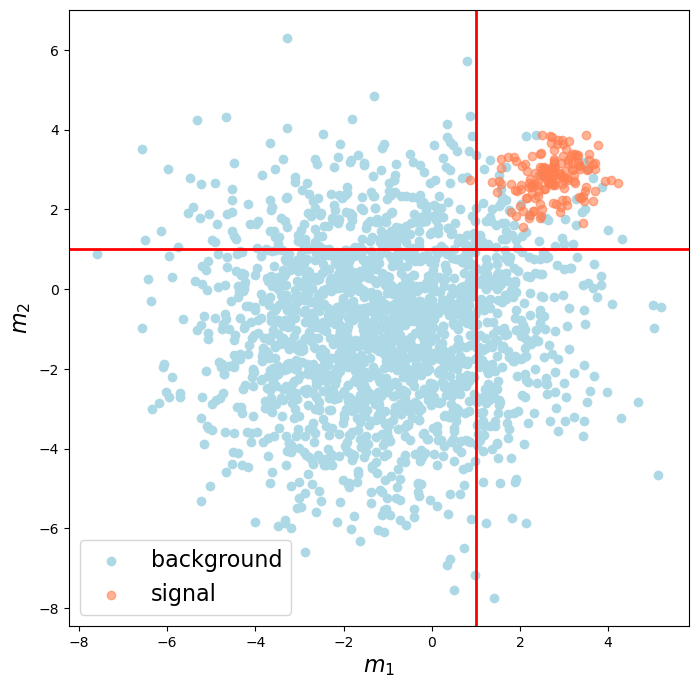

In [14]:
plt.figure(figsize=(8,8))
# Background
plt.scatter(x1, x2, alpha = 1, color="lightblue", label="background")
# Signal
plt.scatter(x3, x4, alpha = 0.6, color="coral", label="signal")
plt.xlabel(r'$m_1$', fontsize=16)
plt.ylabel(r'$m_2$', fontsize=16)
plt.axhline(y=1, color='r', linestyle='-', lw=2)
plt.axvline(x=1, color='r', linestyle='-', lw=2)
plt.legend(fontsize=16)
plt.show
plt.savefig('plots/full_bkg_sig_m_2D.png')
plt.close

In [15]:
def X(k, theta, x1, x2, n, sigma=1):
    return np.random.normal(k*(cos(theta)*x1 + sin(theta)*x2), sigma, n).astype(dtype=np.float32)

In [16]:
k = 0.5
theta = pi/4
bkg_feature = X(k, theta, x1, x2, n=N1)
sig_feature = X(k, theta, x3, x4, n=N2)

<function matplotlib.pyplot.close(fig=None)>

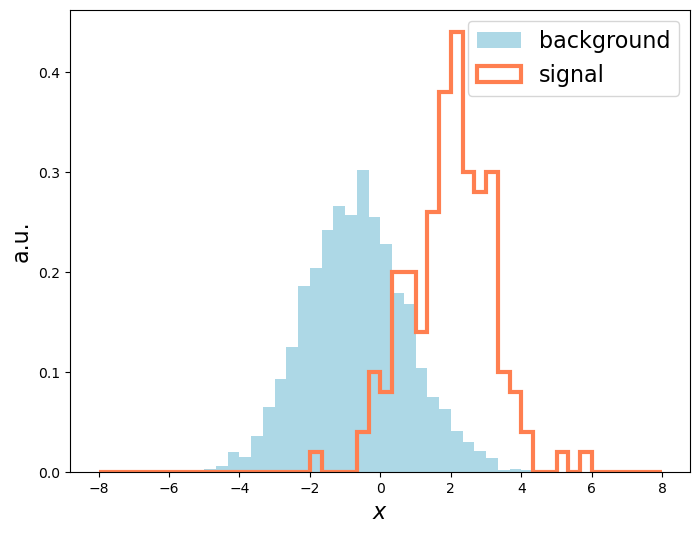

In [18]:
plt.figure(figsize=(8,6))
density = True
bins = np.linspace(-8, 8, 49)
# Background
plt.hist(bkg_feature, bins=bins, density=density,  histtype="stepfilled", alpha = 1, color="lightblue", label="background")
# Signal
plt.hist(sig_feature, bins=bins, density=density, histtype="step", lw=3, alpha = 1, color="coral", label="signal")
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel('a.u.', fontsize=16)
plt.legend(fontsize=16)
plt.show
plt.savefig('plots/full_bkg_sig_x_2D.png')
plt.close